In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('Mall_Customers.csv')
X=df.iloc[:,[3,4]].values
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


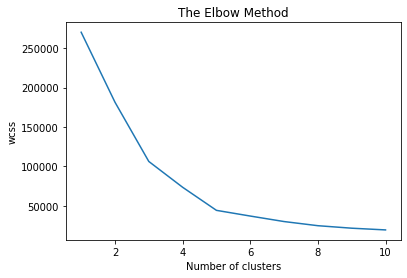

In [3]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [5]:
km=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_km=km.fit_predict(X)
print(y_km)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


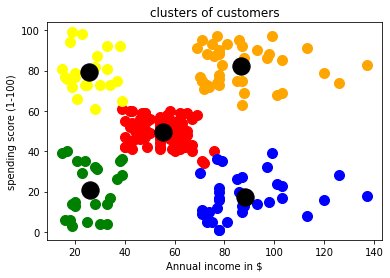

In [7]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=100,c='green',label='Cluster 3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],s=100,c='yellow',label='Cluster 4')
plt.scatter(X[y_km==4,0],X[y_km==4,1],s=100,c='orange',label='Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=300,c='black',label='centroids')
plt.title('clusters of customers')
plt.xlabel('Annual income in $')
plt.ylabel('spending score (1-100)')
plt.show()